In [1]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Helper Functions

In [2]:
os.getcwd()

'd:\\Capstone Project\\House_Pricing\\notebook\\data_wrangling'

In [3]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')

In [4]:
df = pd.read_csv(f"{file_path}/gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [5]:
df.shape

(3803, 23)

In [6]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3803
Columns: 23
Duplicates: 126
For Duplicate Records: ShowDuplicates()


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3677
Columns: 23


In [9]:
da_analysis.CategoricalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,unique_count,top_value,top_count,top_pct,top_3,top_3_pct,rare(<1%)_count,singleton_count,entropy,dominance_ratio,is_binary,high_cardinality
0,property_type,3677,0,0.0000,object,2,flat,2818,76.64,"[flat, house]","[76.64, 23.36]",0,0,0.5436,0.7664,True,False
1,society,3676,1,0.0272,object,677,independent,486,13.22,"[independent, tulip violet, ss the leaf]","[13.22, 2.04, 1.99]",672,309,5.4376,0.1322,False,True
2,sector,3677,0,0.0000,object,104,sohna road,166,4.51,"[sohna road, sector 85, sector 102]","[4.51, 2.94, 2.91]",62,0,4.3422,0.0451,False,True
3,areaWithType,3677,0,0.0000,object,2355,Plot area 360(301.01 sq.m.),37,1.01,"[Plot area 360(301.01 sq.m.), Plot area 300(25...","[1.01, 0.71, 0.52]",2354,1849,7.4545,0.0101,False,True
4,balcony,3677,0,0.0000,object,5,3+,1172,31.87,"[3+, 3, 2]","[31.87, 29.21, 24.04]",0,0,1.4447,0.3187,False,False
5,facing,2632,1045,28.4199,object,9,NaN,1045,28.42,"[nan, North-East, East]","[28.42, 16.94, 16.94]",0,0,1.9831,0.2842,False,False
6,agePossession,3677,0,0.0000,object,6,Relatively New,1646,44.76,"[Relatively New, New Property, Moderately Old]","[44.76, 16.13, 15.31]",0,0,1.5440,0.4476,False,False


In [10]:
da_analysis.NumericalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,min,max,mean,median,std,var (M),1 %,5 %,25 %,50 %,75 %,95 %,99 %,IQR,lower_bound,upper_bound,outliers_count,outlier_percentage,skewness,kurtosis,distribution_summary
0,price,3660,17,0.4623,float64,0.07,31.5,2.53,1.52,2.98,0.00,0.25,0.37,0.95,1.52,2.75,8.5,15.26,1.80,-1.750,5.450,425,11.61,3.28,14.93,"Highly Skewed (Positive: tail on the right), V..."
1,price_per_sqft,3660,17,0.4623,float64,4.00,600000.0,13892.67,9020.00,23210.07,538.71,3299.16,4715.95,6817.25,9020.00,13880.50,33333.0,85052.47,7063.25,-3777.625,24475.375,354,9.67,11.44,186.93,"Highly Skewed (Positive: tail on the right), V..."
2,area,3660,17,0.4623,float64,50.00,875000.0,2888.33,1733.00,23167.51,536.73,250.00,518.85,1232.25,1733.00,2300.00,4246.2,8068.80,1067.75,-369.375,3901.625,216,5.90,29.73,942.03,"Highly Skewed (Positive: tail on the right), V..."
3,bedRoom,3677,0,0.0000,int64,1.00,21.0,3.36,3.00,1.90,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.00,-1.000,7.000,143,3.89,3.49,18.21,"Highly Skewed (Positive: tail on the right), V..."
4,bathroom,3677,0,0.0000,int64,1.00,21.0,3.42,3.00,1.95,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.00,-1.000,7.000,126,3.43,3.25,17.54,"Highly Skewed (Positive: tail on the right), V..."
5,floorNum,3658,19,0.5167,float64,0.00,51.0,6.80,5.00,6.01,0.00,0.00,1.00,2.00,5.00,10.00,18.0,27.00,8.00,-10.000,22.000,81,2.21,1.69,4.52,"Highly Skewed (Positive: tail on the right), L..."
6,super_built_up_area,1875,1802,49.0073,float64,89.00,10000.0,1925.24,1828.00,764.17,0.58,520.36,767.00,1479.50,1828.00,2215.00,3185.0,4636.68,735.50,376.250,3318.250,89,4.75,1.84,10.35,"Highly Skewed (Positive: tail on the right), V..."
7,built_up_area,1690,1987,54.0386,float64,2.00,737147.0,2379.59,1650.00,17942.88,321.95,61.89,240.45,1100.00,1650.00,2400.00,4691.0,7455.50,1300.00,-850.000,4350.000,127,7.51,40.71,1667.87,"Highly Skewed (Positive: tail on the right), V..."
8,carpet_area,1872,1805,49.0889,float64,15.00,607936.0,2529.18,1300.00,22799.84,519.83,92.31,350.00,843.00,1300.00,1790.00,2950.0,6859.50,947.00,-577.500,3210.500,78,4.17,24.33,604.54,"Highly Skewed (Positive: tail on the right), V..."
9,study room,3677,0,0.0000,int64,0.00,1.0,0.19,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,0.00,0.000,0.000,705,19.17,1.57,0.46,"Highly Skewed (Positive: tail on the right), M..."


In [11]:
da_analysis.get_outliers_for_column(column='price').sort_values('price',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.00,NaN,1,1,1,1,0,2,74
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.00,NaN,1,1,0,1,1,1,42
2488,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.00,NaN,1,1,0,1,1,1,138
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.00,350.0,1,1,1,1,0,2,72
1686,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.00,NaN,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,house,independent,sector 43,5.50,28424.0,1935.0,Plot area 215(179.77 sq.m.),1,1,0,1.0,South-West,Old Property,NaN,1935.00,NaN,0,0,0,0,1,0,12
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.00,2250.0,1,1,0,1,1,1,123
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.00,NaN,0,1,0,0,0,2,70
289,flat,experion windchants,sector 112,5.49,11584.0,4739.0,Super Built up area 4739(440.27 sq.m.)Built Up...,4,5,3+,5.0,South,Relatively New,4739.0,3655.35,NaN,0,1,0,0,0,1,168


# --------------- 1. Univariate Analysis Categorical Column ------------------

In [12]:
## Class Instantiation 
df_uni = UnivariateAnalysis(df) 
column_type = df_uni.ColumnVariable()

dict_keys(['categorical_columns', 'numerical_columns'])


In [13]:
categorical_columns = column_type.get('categorical_columns')
numerical_columns = column_type.get('numerical_columns')

#### Property Type Column Deep Analysis

In [14]:
categorical_columns

['property_type',
 'society',
 'sector',
 'areaWithType',
 'balcony',
 'facing',
 'agePossession']

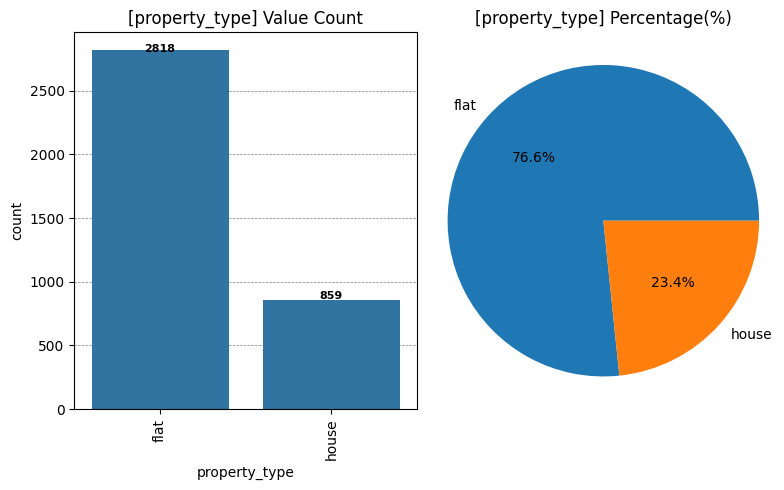

In [15]:
# ### Categorical Column Analysis
# for each in categorical_columns:
#     df_uni.CategoricalFeaturesAnalysis(each)

property_type_observation = df_uni.CategoricalFeaturesAnalysis('property_type')


In [16]:
property_type_observation

,field,property_type
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,2
5,top_value,flat
6,top_count,2818
7,top_pct,76.64
8,top_3,"[flat, house]"
9,top_3_pct,"[76.64, 23.36]"


#### Society Column Deep Analysis

[society] Has Higher Unique Values, Picked Top Higher Frequency Value


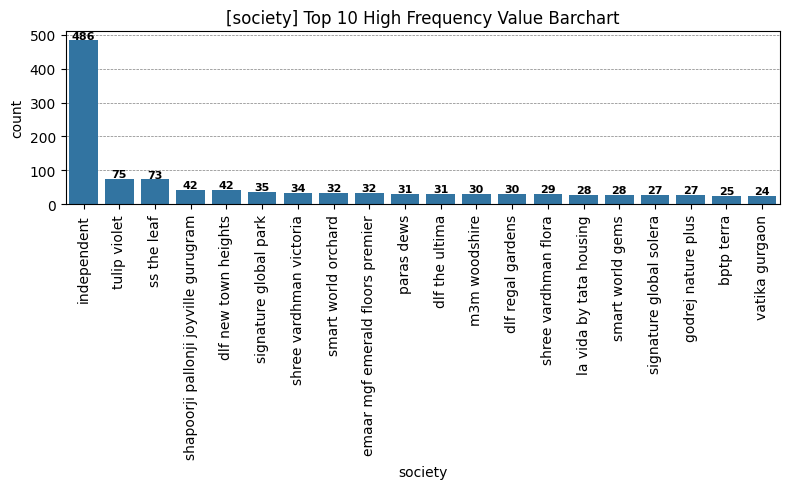

In [17]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)


df_uni = UnivariateAnalysis(df) 
society_observation = df_uni.CategoricalFeaturesAnalysis('society')

In [18]:
society_observation

,field,society
0,non_null_count,3676
1,null_count,1
2,null%,0.0272
3,dtype,object
4,unique_count,677
5,top_value,independent
6,top_count,486
7,top_pct,13.22
8,top_3,"[independent, tulip violet, ss the leaf]"
9,top_3_pct,"[13.22, 2.04, 1.99]"


In [19]:
df['society'].isnull().sum()
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


#### Sector Column Deep Analysis

[sector] Has Higher Unique Values, Picked Top Higher Frequency Value


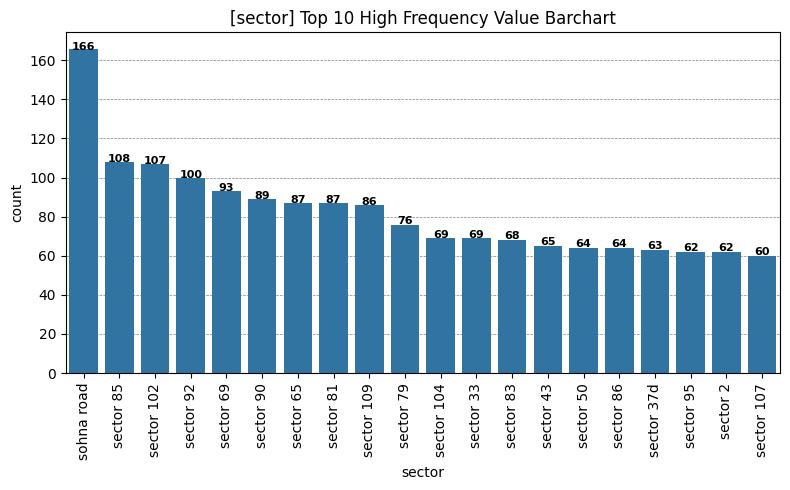

In [20]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
sector_observation = df_uni.CategoricalFeaturesAnalysis('sector')

In [21]:
sector_observation

,field,sector
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,104
5,top_value,sohna road
6,top_count,166
7,top_pct,4.51
8,top_3,"[sohna road, sector 85, sector 102]"
9,top_3_pct,"[4.51, 2.94, 2.91]"


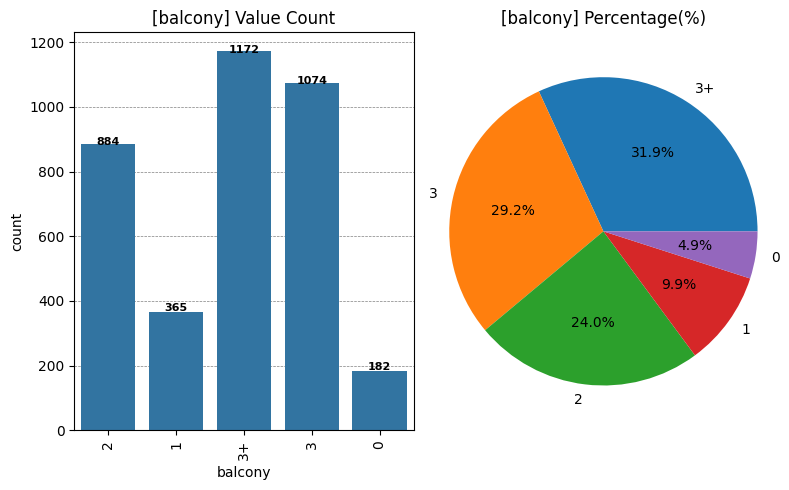

In [22]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
balcony_observation = df_uni.CategoricalFeaturesAnalysis('balcony')

# ---------------2. Univariate Analysis Numerical Column -------------------

In [23]:
numerical_columns

['price',
 'price_per_sqft',
 'area',
 'bedRoom',
 'bathroom',
 'floorNum',
 'super_built_up_area',
 'built_up_area',
 'carpet_area',
 'study room',
 'servant room',
 'store room',
 'pooja room',
 'others',
 'furnishing_type',
 'luxury_score']

In [24]:
# for each in numerical_columns:
#     df_uni.NumericalFeatureAnalysis(each)

#### [Price] Column Deep Analysis 

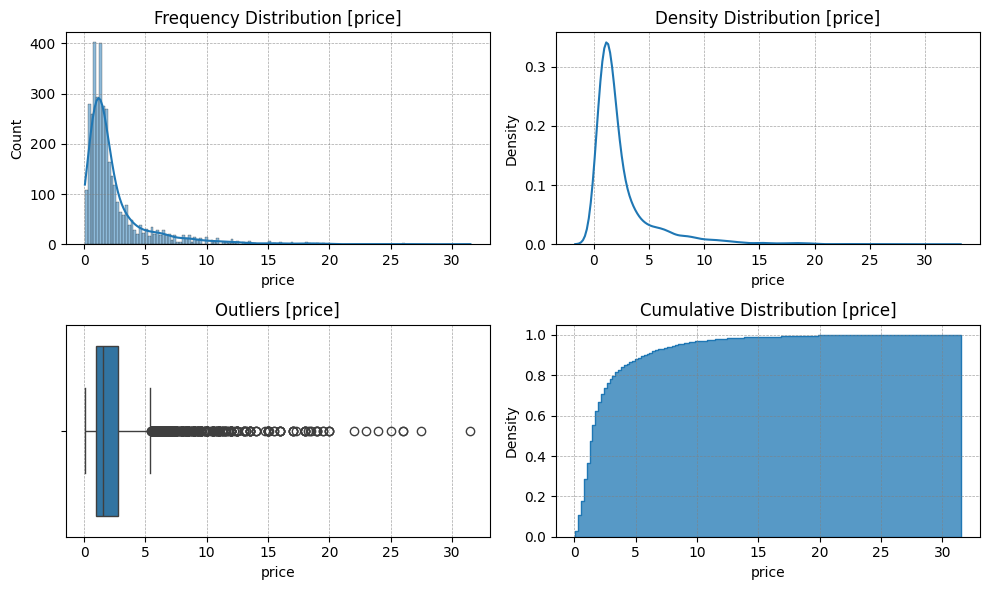

In [25]:
## Initial Data Visaulization Of Area

df_uni = UnivariateAnalysis(df) 
price_observation, price_outlier_df = df_uni.NumericalFeatureAnalysis('price')

In [26]:
price_observation

,field,price
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,0.07
5,max,31.5
6,mean,2.53
7,median,1.52
8,std,2.98
9,var (M),0.0


In [27]:
price_outlier_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
6,flat,paras quartier,gwal pahari,7.50,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,1,49
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
25,house,independent,sector 41,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),8,5,3+,3.0,NaN,Old Property,NaN,3240.0,NaN,0,1,1,1,0,1,26
26,house,independent,sector 41,7.00,28283.0,2475.0,Plot area 275(229.94 sq.m.),7,7,3+,3.0,South-West,Moderately Old,NaN,2475.0,NaN,1,1,1,1,0,2,151
29,house,international city by sobha phase 2,sector 109,5.65,10463.0,5400.0,Plot area 600(501.68 sq.m.),4,4,3+,2.0,North-East,New Property,NaN,5400.0,NaN,0,1,0,0,1,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,flat,vipul belmonte,sector 53,6.50,21922.0,2965.0,Super Built up area 2965(275.46 sq.m.),3,4,3+,0.0,NaN,Old Property,2965.0,NaN,NaN,1,0,0,0,1,0,72
3791,house,international city by sobha phase 2,sector 109,6.44,26502.0,2430.0,Plot area 270(225.75 sq.m.),4,5,3+,3.0,North-East,New Property,NaN,2430.0,NaN,1,1,1,1,0,0,138
3794,house,independent,sector 27,8.00,26298.0,3042.0,Plot area 338(282.61 sq.m.),9,9,3,4.0,North-East,Relatively New,NaN,3042.0,NaN,1,1,1,1,0,2,110
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,2.0,South-West,Relatively New,NaN,6228.0,NaN,1,1,1,1,0,0,160


In [28]:
# price_outlier_df.to_csv('price_outlier_df.csv', index=False)

### Since Our Output Data is highly Skewed, Log Transformation Experiment for Normal distribution 


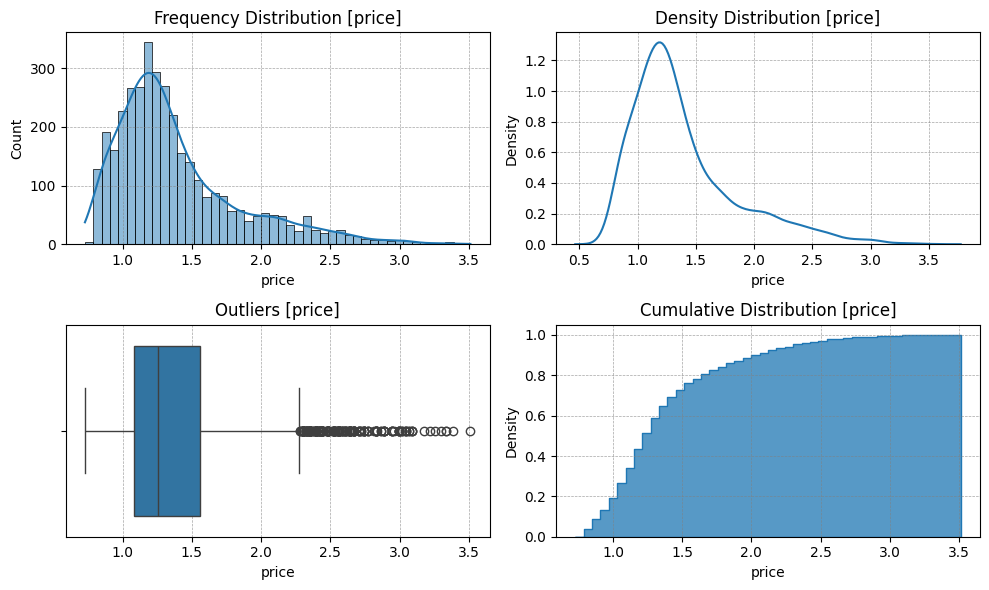

In [29]:
log_transfored_df = df.copy()
log_transfored_df['price'] = np.log1p(log_transfored_df['price'] + 1)
log_transfored_df =  UnivariateAnalysis(log_transfored_df)
log_transfored_Observation, log_transfored_outliers  = log_transfored_df.NumericalFeatureAnalysis('price')

In [30]:
# log_transfored_outliers

#### [price_per_sqft] Column Deep Analysis 

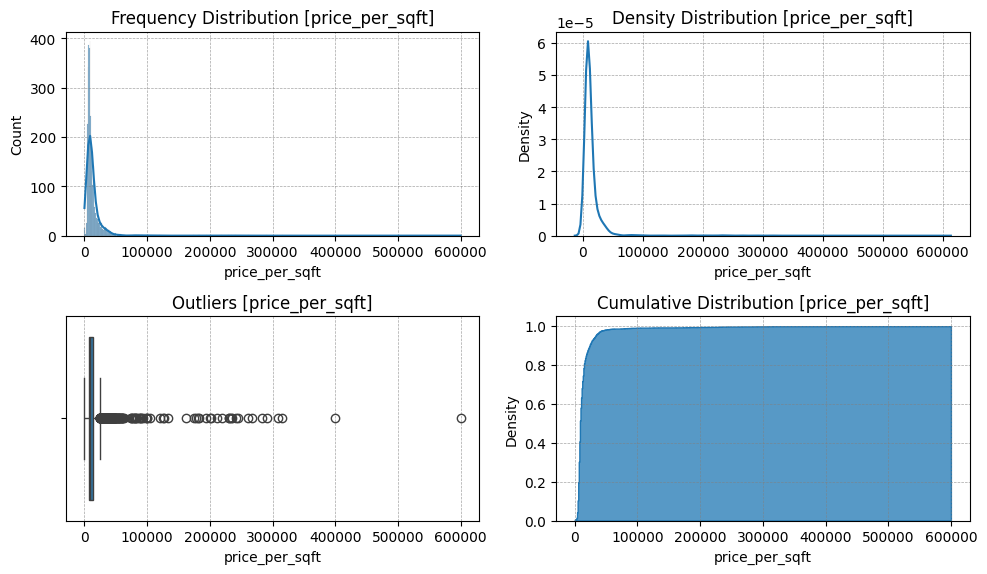

In [31]:
## Initial Data Visaulization

df_uni = UnivariateAnalysis(df) 
price_per_sqft_observation , price_per_sqft_outliers = df_uni.NumericalFeatureAnalysis('price_per_sqft')

In [32]:
price_per_sqft_observation

,field,price_per_sqft
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,4.0
5,max,600000.0
6,mean,13892.67
7,median,9020.0
8,std,23210.07
9,var (M),538.71


In [33]:
price_per_sqft_outliers['price_per_sqft'].describe()

count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [34]:
price_per_sqft_outliers

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,dlf city phase 1,sector 26,4.50,33333.0,1350.0,Plot area 150(125.42 sq.m.),3,3,2,2.0,East,Moderately Old,NaN,1350.0,NaN,1,1,0,0,0,0,70
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
25,house,independent,sector 41,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),8,5,3+,3.0,NaN,Old Property,NaN,3240.0,NaN,0,1,1,1,0,1,26
26,house,independent,sector 41,7.00,28283.0,2475.0,Plot area 275(229.94 sq.m.),7,7,3+,3.0,South-West,Moderately Old,NaN,2475.0,NaN,1,1,1,1,0,2,151
39,house,vipul tatvam villa,sector 48,8.25,38194.0,2160.0,Plot area 350(292.64 sq.m.)Built Up area: 300 ...,4,4,3+,3.0,North-East,Relatively New,NaN,300.0,240.0,0,1,1,0,0,1,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,house,huda sector-56 gurgaon,sector 56,3.60,24845.0,1449.0,Plot area 161(134.62 sq.m.),5,5,3+,3.0,North-East,Moderately Old,NaN,1449.0,NaN,0,0,0,0,1,0,47
3774,house,independent,sector 28,0.45,90000.0,50.0,Built Up area: 50 (4.65 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,50.0,NaN,0,0,0,0,0,0,0
3791,house,international city by sobha phase 2,sector 109,6.44,26502.0,2430.0,Plot area 270(225.75 sq.m.),4,5,3+,3.0,North-East,New Property,NaN,2430.0,NaN,1,1,1,1,0,0,138
3794,house,independent,sector 27,8.00,26298.0,3042.0,Plot area 338(282.61 sq.m.),9,9,3,4.0,North-East,Relatively New,NaN,3042.0,NaN,1,1,1,1,0,2,110


In [35]:
### In 'area' column data error, (area<1000) in square yards, (area>1000) in sq ft. 
## Logic Applied All the area < 1000 Multiplied By 9 (sq ft = sq yd × 9)
price_per_sqft_outliers['area'] = price_per_sqft_outliers['area'].apply(lambda x:x*9 if x<1000 else x)

## Recalulate price_per_sqft
price_per_sqft_outliers['price_per_sqft'] = round((price_per_sqft_outliers['price']*10000000)/price_per_sqft_outliers['area'])

price_per_sqft_outliers['price_per_sqft'].describe()


count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [36]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [37]:
## Update in Original Data Frame 
df.update(price_per_sqft_outliers)

In [38]:
df['price_per_sqft'].describe()

count     3660.000000
mean     11645.377049
std       8123.060188
min          4.000000
25%       6738.000000
50%       8928.000000
75%      13492.750000
max      82540.000000
Name: price_per_sqft, dtype: float64

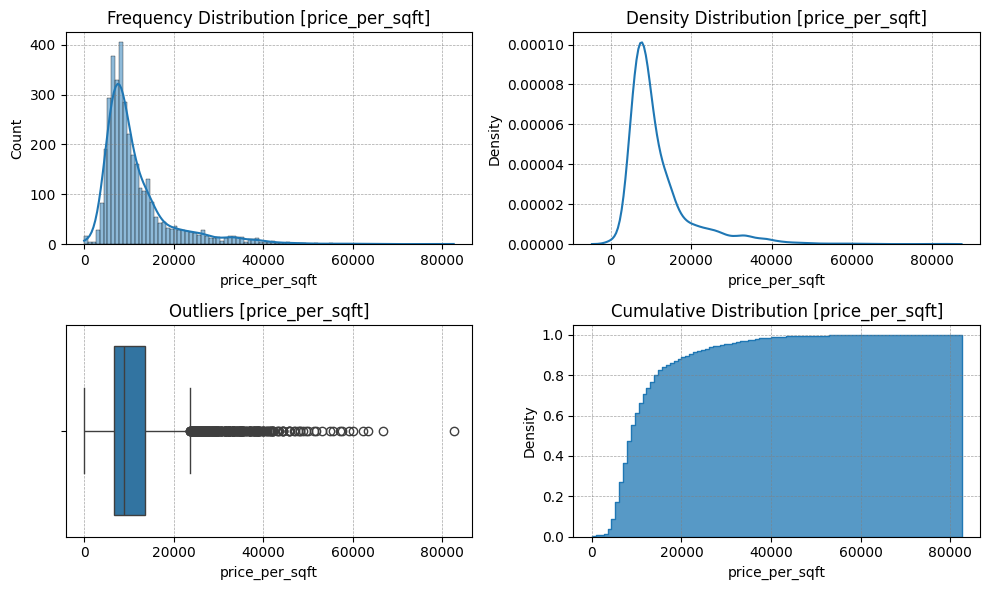

In [39]:
## After Recalculating area Price per square feet Logic

df_uni = UnivariateAnalysis(df)
a, b = df_uni.NumericalFeatureAnalysis(column='price_per_sqft')

In [40]:
df[df['price_per_sqft'] > 50000].shape

(13, 23)

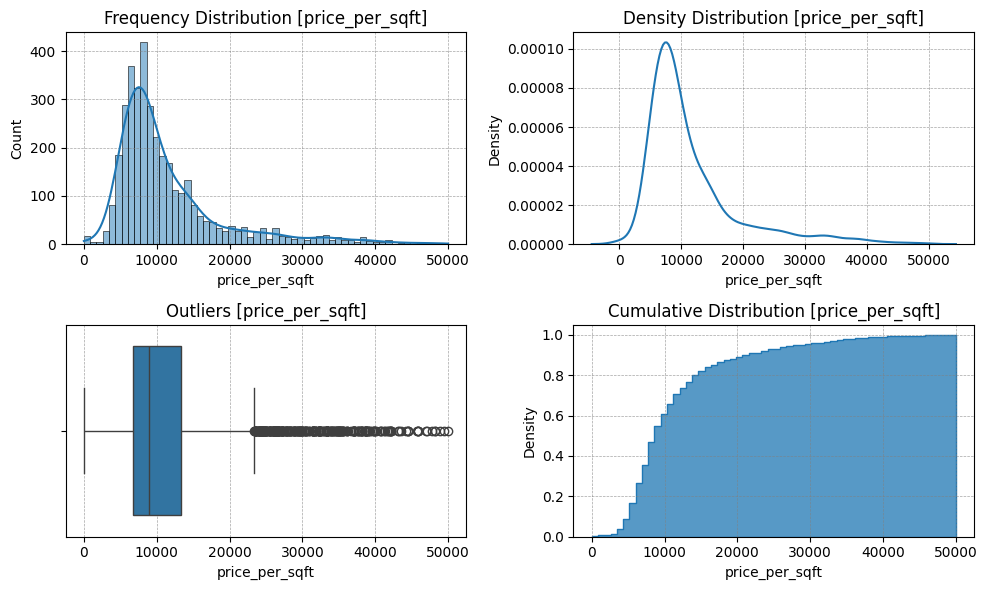

In [41]:
## Drop all the record where price_per_sqft> 50000
df= df[df['price_per_sqft'] <= 50000]

## After droping all the record where price_per_sqft> 50000
df_uni = UnivariateAnalysis(df)
a, b = df_uni.NumericalFeatureAnalysis(column='price_per_sqft')

#### [Area] Column Deep Analysis 

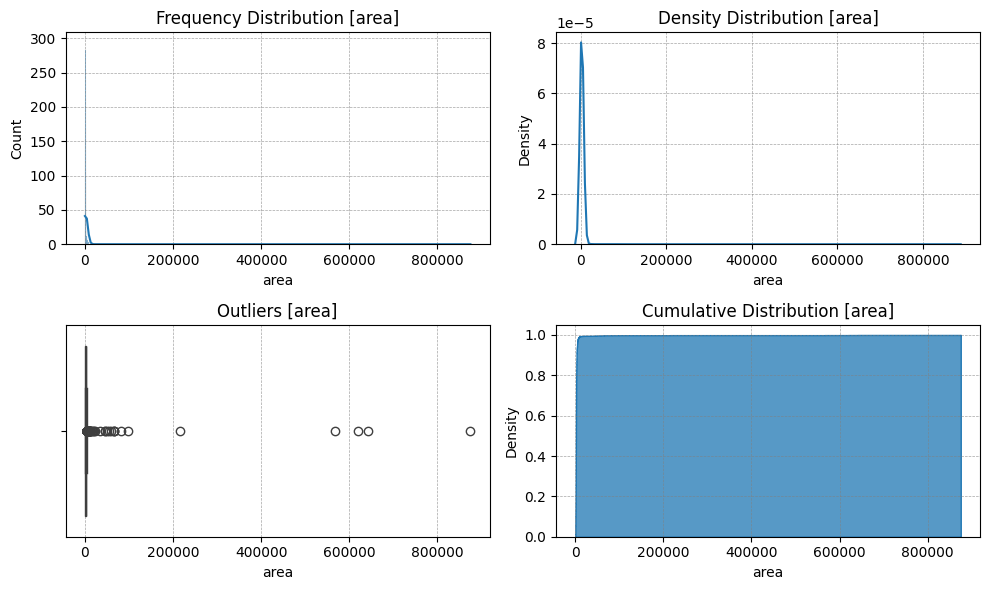

In [42]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

In [43]:
a

,field,area
0,non_null_count,3647
1,null_count,0
2,null%,0.0
3,dtype,float64
4,min,145.0
5,max,875000.0
6,mean,2947.72
7,median,1750.0
8,std,23208.19
9,var (M),538.62


In [44]:
## Verifying the count of the Outliers in area column.

df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0


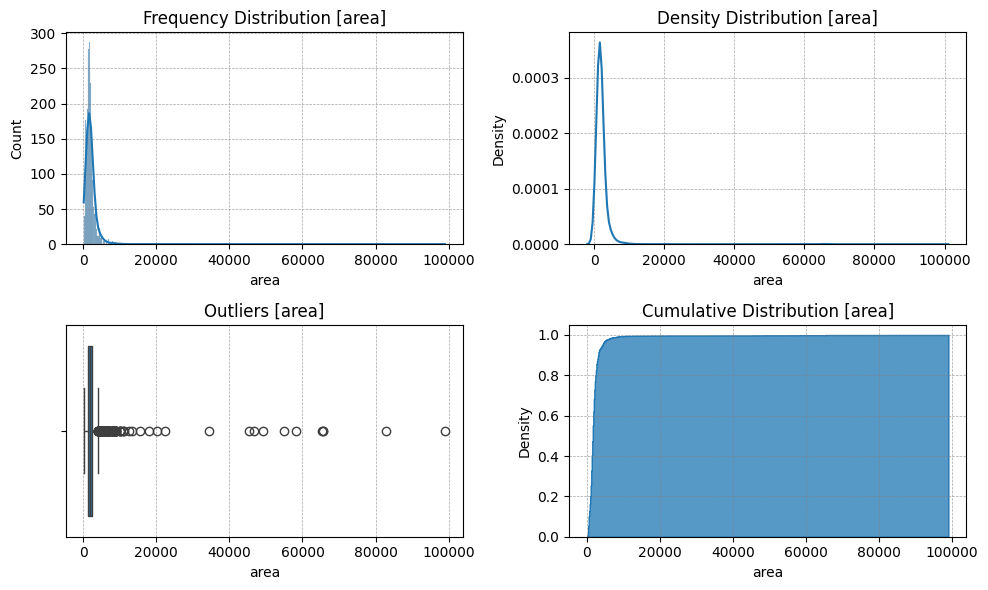

In [45]:
## Filtering All Records where Area < 100000
df = df[df['area'] < 100000]

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

In [46]:
## Fetching record where area > 10000 10 thousand
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [47]:
## Given Indexs has data Data Errors, decided to drop 

df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [48]:
## Exploring Data which area > 10000

df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
2131,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
3088,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3444,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2342,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [49]:
## Updating areas based on the error
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

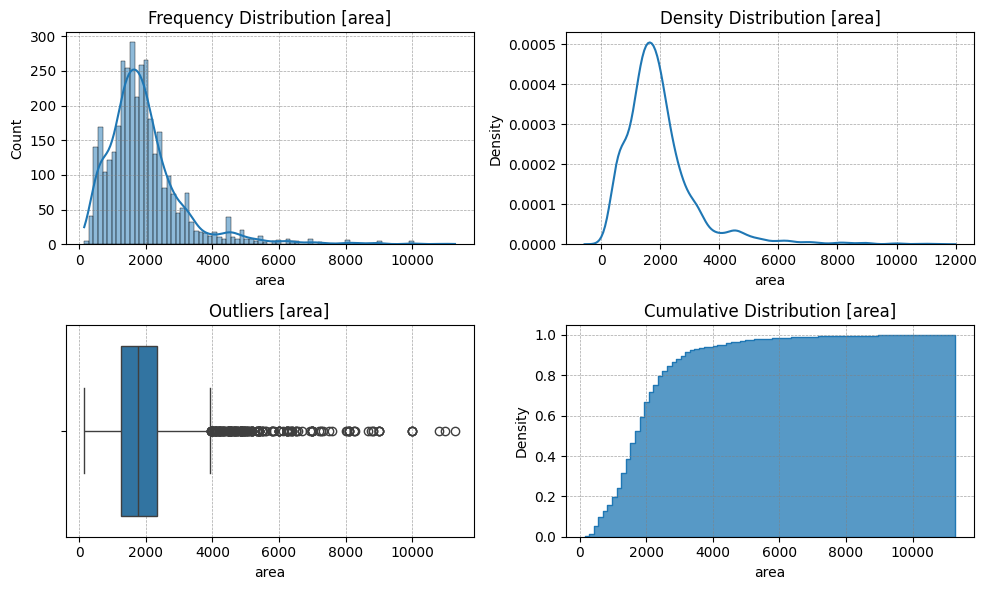

In [50]:
## After Removing records where error detected and after updating area calculation.
df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('area')

### [bedRoom] Deep Analysis

Considered Descrete - Low Cardinality: bedRoom(int64)


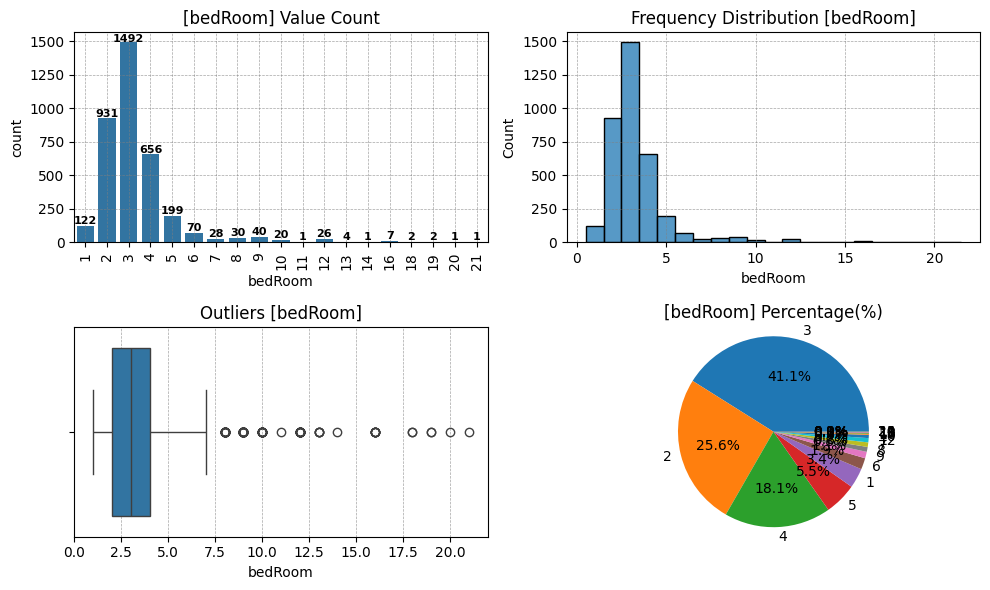

In [51]:
df_uni = UnivariateAnalysis(df)
bedRoom_observation, bedRoom_observation_outlier = df_uni.NumericalFeatureAnalysis('bedRoom')

In [52]:
bedRoom_observation

,field,bedRoom
0,non_null_count,3633
1,null_count,0
2,null%,0.0
3,dtype,int64
4,min,1.0
5,max,21.0
6,mean,3.33
7,median,3.0
8,std,1.83
9,var (M),0.0


In [53]:
bedRoom_observation_outlier

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
25,house,independent,sector 41,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),8,5,3+,3.0,NaN,Old Property,NaN,3240.0,NaN,0,1,1,1,0,1,26
48,house,ganpati heights apartment,sector 13,1.25,151.0,1035.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
66,house,independent,sector 13,0.50,10101.0,495.0,Plot area 55(5.11 sq.m.),12,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,0,15
74,house,independent,sector 25,7.60,38756.0,1961.0,Plot area 215(179.77 sq.m.),9,9,3,4.0,East,Relatively New,NaN,1935.0,NaN,1,0,1,1,0,1,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
3698,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
3713,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10,9,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1,1,0,0,0,1,36
3777,house,independent,sector 17,9.50,23457.0,4050.0,Plot area 502(419.74 sq.m.)Built Up area: 500 ...,8,8,3,3.0,West,Relatively New,NaN,500.0,450.0,1,0,0,0,0,1,27


In [54]:
## Fetching Record where bedroom > 10
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape

(45, 23)

(3588, 23)
Considered Descrete - Low Cardinality: bedRoom(int64)


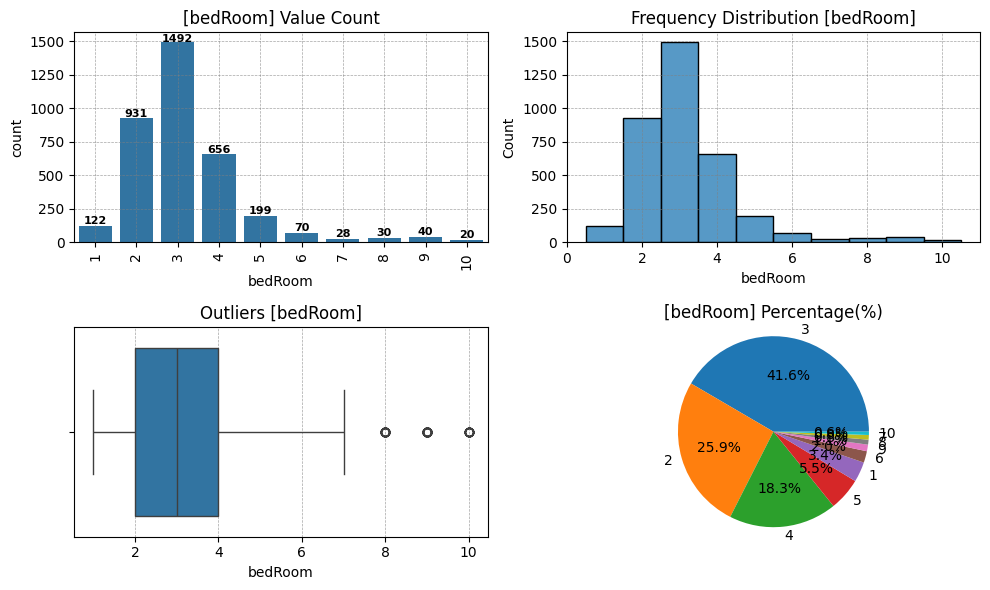

In [55]:
## Filtering Data Frame where bedRoom <= 10
df = df[df['bedRoom'] <= 10]
print(df.shape)

## After Applying Filter
df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('bedRoom')

### [bathroom] Deep Analysis

Considered Descrete - Low Cardinality: bathroom(int64)


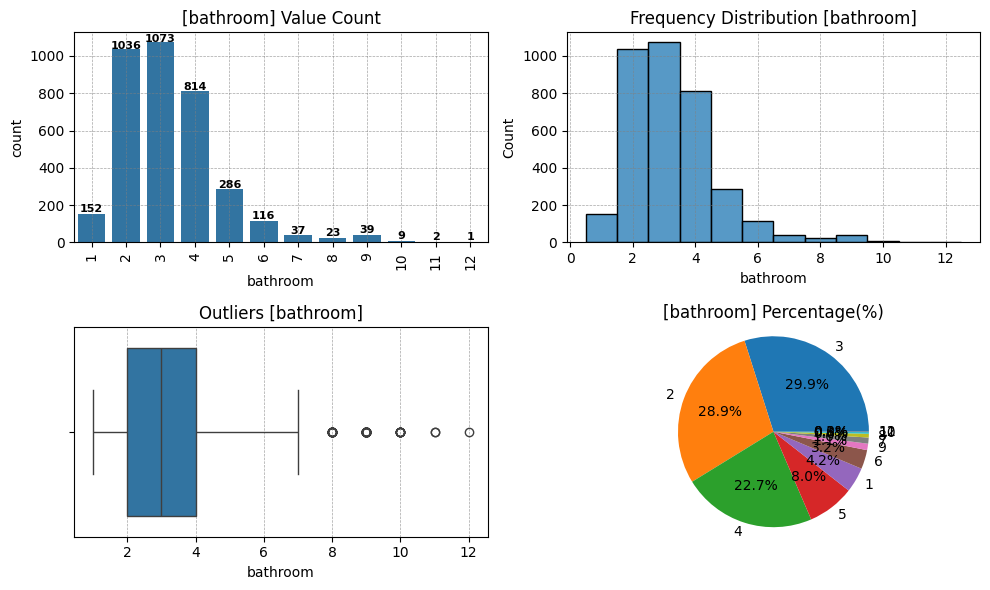

In [56]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
bathroom_obdervation , bathroom_outliers = df_uni.NumericalFeatureAnalysis('bathroom')

In [57]:
## Fetching Record Bathroom > 10
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3267,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
2771,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
2816,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


## [super_built_up_area] deep analysis

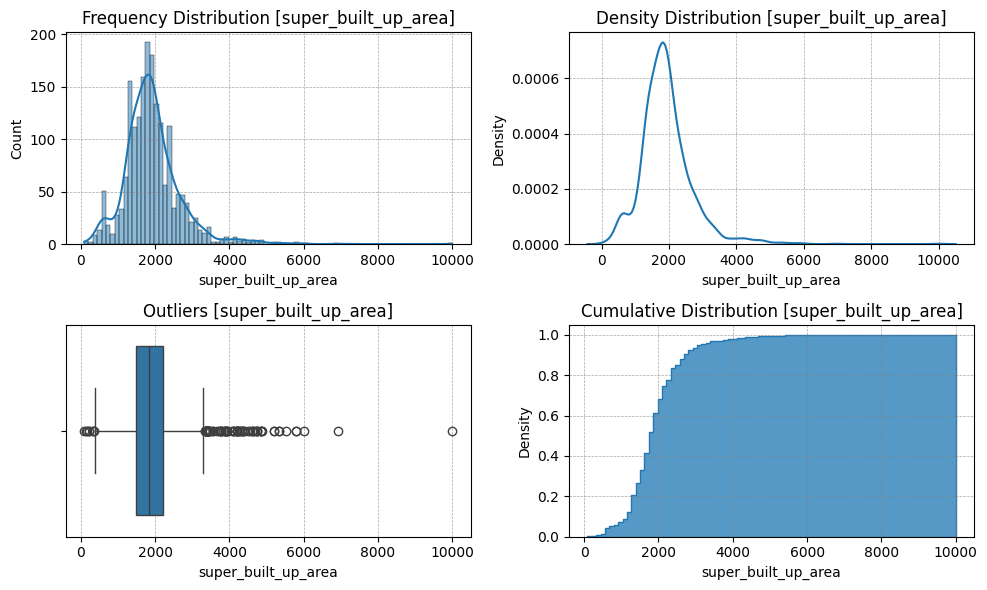

In [58]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
super_built_up_area_observation , super_built_up_area_outliers = df_uni.NumericalFeatureAnalysis('super_built_up_area')

In [59]:
## Fetching Records super_built_up_area > 6000
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


## [built_up_area] Deep Analysis

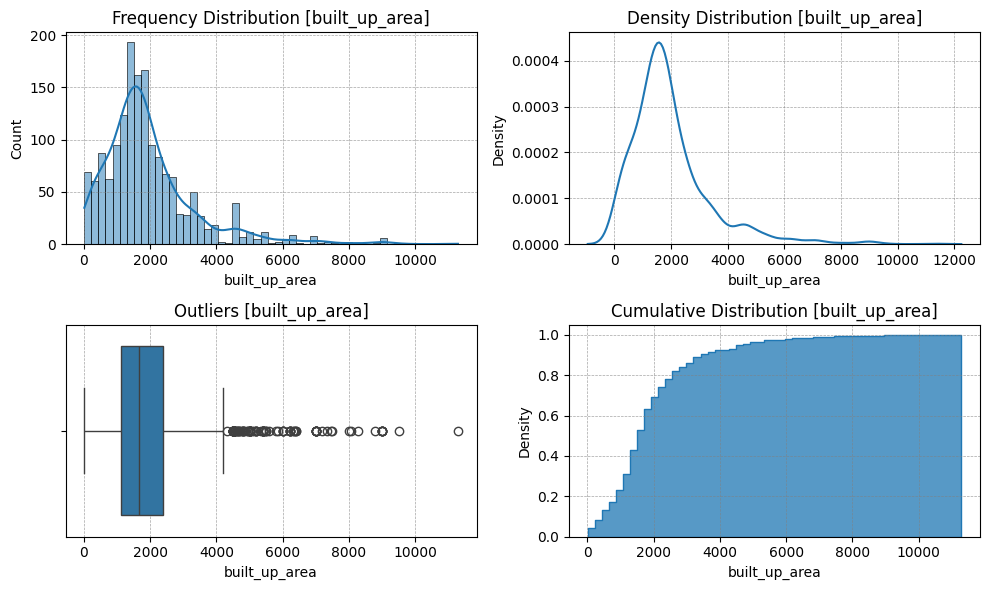

In [60]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
built_up_area_observation , built_up_area_outliers = df_uni.NumericalFeatureAnalysis('built_up_area')

In [61]:
## Fetching Records built_up_area > 10000

df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


## [carpet_area] Deep Analysis

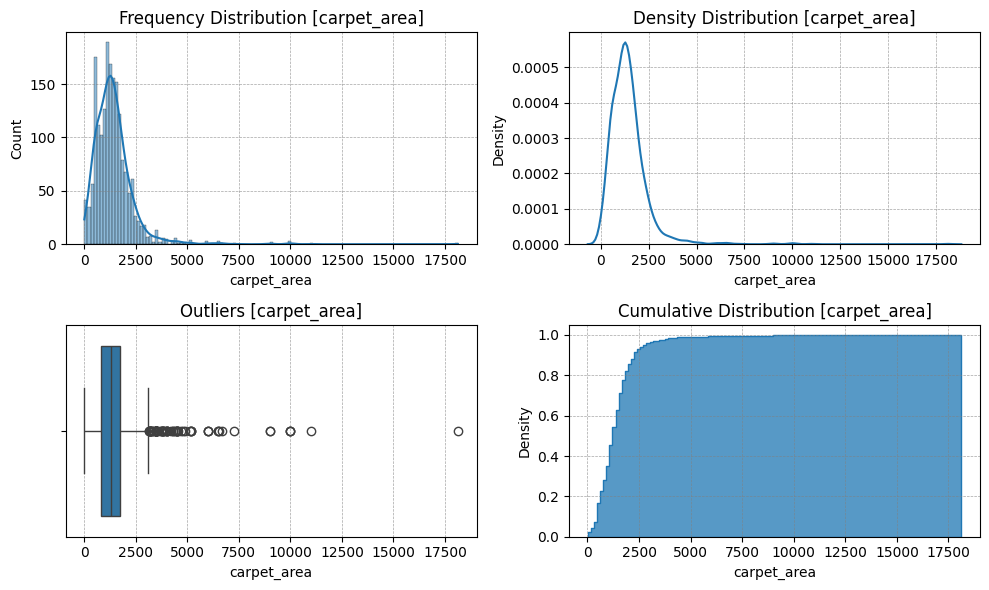

In [62]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
carpet_area_observation , carpet_area_outliers = df_uni.NumericalFeatureAnalysis('carpet_area')

In [63]:
## Fetchning Records carpet_area > 10000
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [64]:
df.loc[2131,'carpet_area'] = 1812
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


## [luxury_score] Deep Analysis

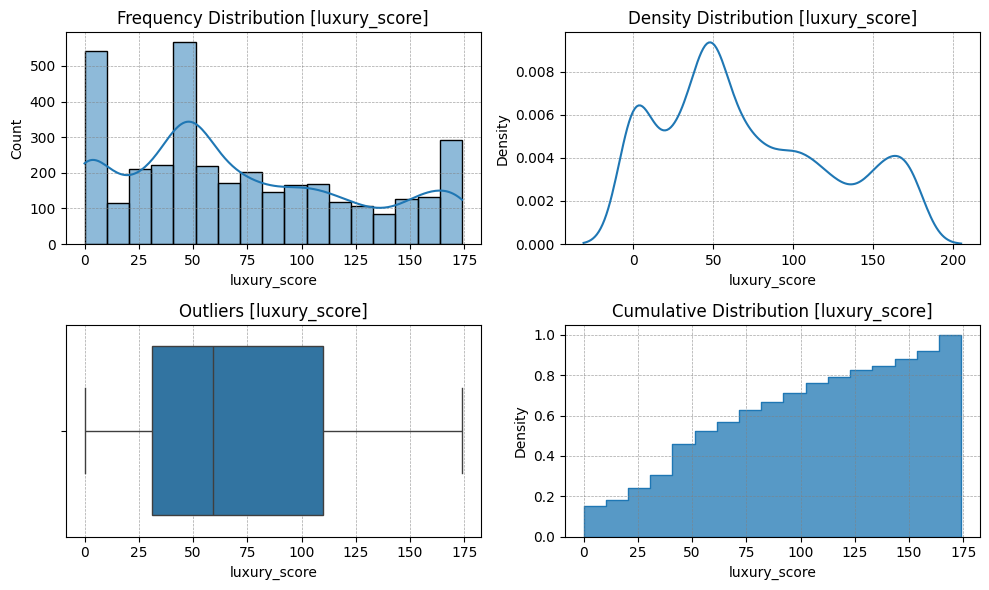

In [65]:
## Initial Data Visualization

df_uni = UnivariateAnalysis(df)
luxury_score_observation , luxury_score_outliers = df_uni.NumericalFeatureAnalysis('luxury_score')

In [66]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159


In [67]:
## Recalculating price_per_sqft to avoid any protential data error after Making few updates 

df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

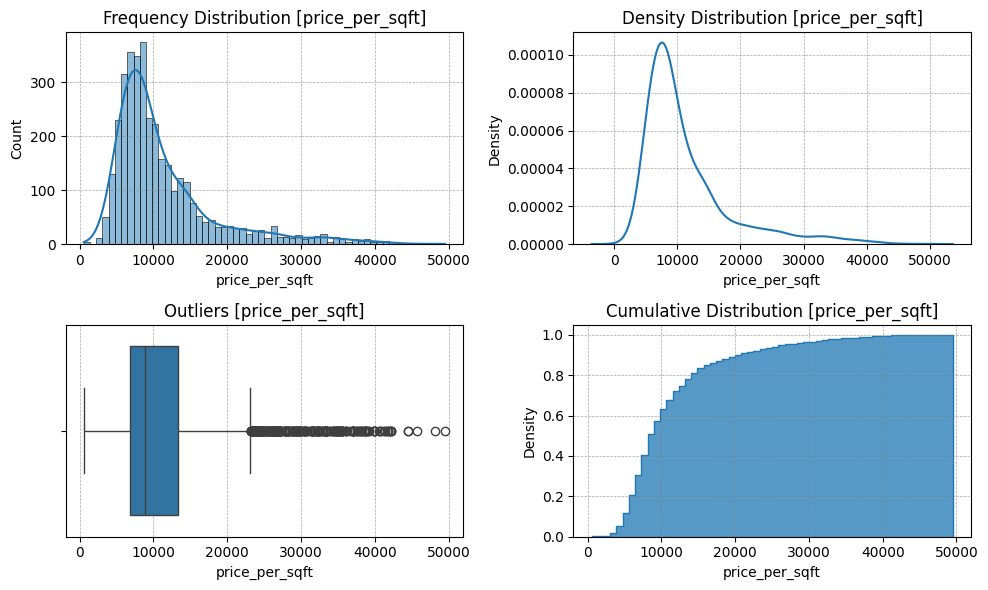

In [68]:
## Checking for any potential outliers

df_uni = UnivariateAnalysis(df)
a,b = df_uni.NumericalFeatureAnalysis('price_per_sqft')

In [69]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
711,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
901,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
1090,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1509,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
1526,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
2040,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2130,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
3054,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3108,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0


In [70]:
## Caluculate Room Ratio 5 percentile
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(250.5)

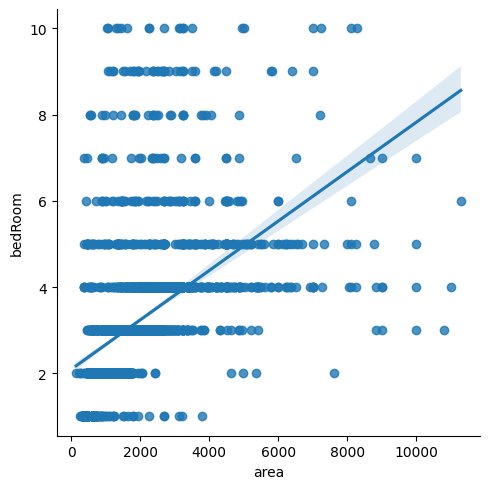

In [71]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [72]:
## Add Column for Area Room Ratio Calculation
df['area_room_ratio'] = df['area']/df['bedRoom']

In [73]:
df[df['area_room_ratio']<250]['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
6     17
4     17
9     15
8     12
10     8
7      8
Name: count, dtype: int64

In [74]:
## Filter data frame for area_room_ratio > 100 (Basically Drop all records where area_room_ratio < 100)
df = df[df['area_room_ratio'] > 100]

In [75]:
## Investigation Any Annomoly 
## More than 3 bed rooms where ratio < 250 are observed

outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]
outliers_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
9,house,independent,sector 105,1.20,10118.0,1186.0,Plot area 1185.51(110.14 sq.m.),6,2,1,2.0,North-West,Old Property,NaN,1185.51,NaN,0,0,0,0,0,0,9,197.666667
15,house,independent,sector 12,1.20,14184.0,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq...,4,4,2,2.0,North,Relatively New,NaN,846.00,NaN,0,0,0,1,0,1,7,211.500000
48,house,ganpati heights apartment,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.00,NaN,0,0,0,0,1,0,7,103.500000
74,house,independent,sector 25,7.60,38756.0,1961.0,Plot area 215(179.77 sq.m.),9,9,3,4.0,East,Relatively New,NaN,1935.00,NaN,1,0,1,1,0,1,84,217.888889
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.00,NaN,0,0,0,0,0,0,0,113.000000
3686,house,independent,sector 12,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4,4,0,2.0,NaN,Undefined,NaN,675.00,NaN,0,0,0,0,0,0,0,168.750000
3713,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10,9,3+,4.0,North,Moderately Old,NaN,1620.00,NaN,1,1,0,0,0,1,36,162.000000
3738,house,independent,sector 7,1.16,11694.0,992.0,Plot area 992(92.16 sq.m.)Carpet area: 992 sq....,5,4,2,3.0,North-East,Moderately Old,NaN,NaN,992.0,0,0,0,0,1,0,39,198.400000


In [76]:
## For Records that has more than 3 bedroom is dividev by the FloorNum
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])

In [77]:
df.update(outliers_df)

In [78]:
df.shape

(3568, 24)

In [79]:
## Recalulating area_room_ratio after df update
df['area_room_ratio'] = df['area']/df['bedRoom']

## Reinvestigating for bed room > 4
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
387,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
753,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1106,house,independent,sector 5,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1206,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1747,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
1936,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1939,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
2806,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
3148,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000


In [80]:
## Dropping Records where bedroom > 4 
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

In [81]:
df.shape

(3555, 24)

In [82]:
df.to_csv(f"{file_path}/7.gurgaon_properties_outlier_treated.csv",index=False)

In [83]:
# import dtale
# d = dtale.show(df)
# d.open_browser()

